# Herkunftsländer der Arbeitnehmer

In [61]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.style.use('../own_style.mplstyle')
%matplotlib inline


In [62]:
#cleanup.generate_cleaned_df()


Es lassen sich zwei Spalten im Datensatz vorfinden, die im Bezug auf die Fragestellung genutzt werden können, dies sind:
- country_of_citizenship: Das Land, welcher Staatsangehörigkeit die Person angehört
- foreign_worker_info_birth_country Das Land, in welchem die Person gebpren wurde.

In [63]:
col_list = ["country_of_citizenship", "foreign_worker_info_birth_country"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Werfen wir einen schnelen Blick auf die vorliegenden Daten, indem wir einen Graphen ausgeben lassen, welcher die Spalte country_of_citizenship visualisiert.



<AxesSubplot:title={'center':'Number of Visa Applications by Country of Citizenship'}, xlabel='Country of Citizenship', ylabel='Number of Visa Applications'>

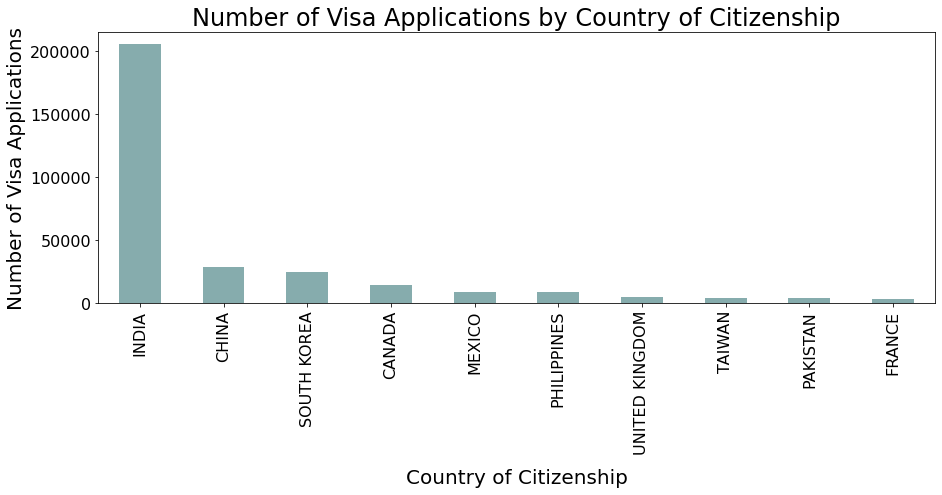

In [64]:
plt.xlabel("country_of_citizenship", labelpad=14)
visas_df['country_of_citizenship'].value_counts()[:10].plot(kind="bar", xlabel="Country of Citizenship", ylabel = "Number of Visa Applications", title = "Number of Visa Applications by Country of Citizenship", figsize = [15,5])


Ergebnis: Die meisten Arbeitnehmer kommen aus den folgenden Ländern:

- Indien
- China
- Süd Korea

Die erhobenen Werte sollen noch mit den Geburtsorten der Arbeitnehmer verglichen werden.
Jedoch sind die beiden zu vergleichenden Splaten nicht vollständig mit nicht-NaN Werte gefüllt.

In [65]:
print("NaN Werte: ")
print("country_of_citizenship: " + str(visas_df['country_of_citizenship'].isna().sum()))
print("foreign_worker_info_birth_country: " + str(visas_df['foreign_worker_info_birth_country'].isna().sum()))

NaN Werte: 
country_of_citizenship: 59
foreign_worker_info_birth_country: 223928


Um eine Vergleichbarkeit  beider Spalten zu ermöglichen, werden wir im folgenden nur Zeilen, ohne NaN Werte betrachten.

In [66]:
visas_df = visas_df.dropna()
visas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150427 entries, 223909 to 374361
Data columns (total 2 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   country_of_citizenship             150427 non-null  object
 1   foreign_worker_info_birth_country  150427 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


Es verbleiben jeweils 150427 Werte, welche für die nachfolgende Analyse ausreichen sollten.
Nun werden wir pro Spalten die Anzahl an Werten durchzählen lassen und anschließend einem neuen Dataframe zuführen.

In [67]:

count_df1 = visas_df['country_of_citizenship'].value_counts().to_frame()
count_df2 = visas_df['foreign_worker_info_birth_country'].value_counts().to_frame()


graph_df = count_df1.join(count_df2)[:10]

graph_df.head()

,country_of_citizenship,foreign_worker_info_birth_country
INDIA,81076,81334.0
CHINA,12988,13757.0
SOUTH KOREA,11996,12152.0
CANADA,5232,2385.0
MEXICO,3322,3378.0


Es wird eine Verhältnis Kennzahl gebildet um starke Unterschiede zwischen Herkunftsland und Geburtsland ausmachne zu könenn.

In [68]:
graph_df["realtion"] = graph_df['country_of_citizenship'] / graph_df['foreign_worker_info_birth_country']

In [69]:
graph_df["realtion"].head()

INDIA          0.996828
CHINA          0.944101
SOUTH KOREA    0.987163
CANADA         2.193711
MEXICO         0.983422
Name: realtion, dtype: float64

Vorerst werden Herkunfts- und Geburtsland auf einem einfachen Liniendiagramm ausgegeben.

In [70]:
values_coz = graph_df['country_of_citizenship']
values_fwibc = graph_df['foreign_worker_info_birth_country'].astype(int)
values_rel = graph_df['realtion']

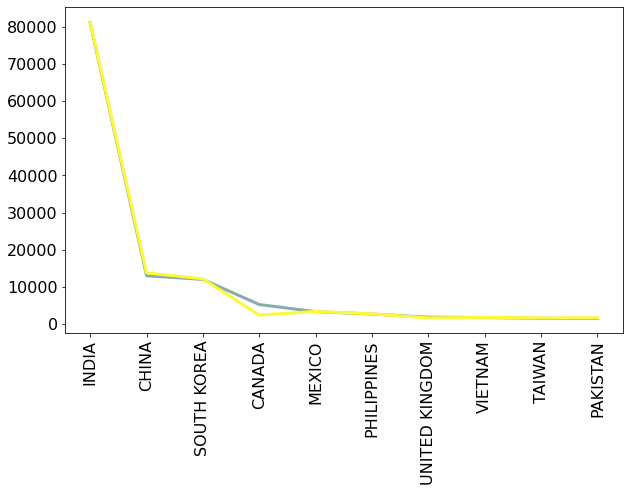

In [71]:
plt.figure(figsize=(10,6))

plt.plot(values_coz)
plt.plot(values_fwibc)
plt.xticks(rotation=90)
plt.show()

Das Liniendiagramm eignet sich nicht für die Darstellung.
- Die Linien überdecken sich gegenseitig

Wir versuchen eine bessere Darstellungsform mit einem gruppierten Balkendiagramm zu finden.
Zudem wollen wir das zuvor berechnete Verhältnis auf einer zweiten Skalierung ausgeben.

Hier hilft uns: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

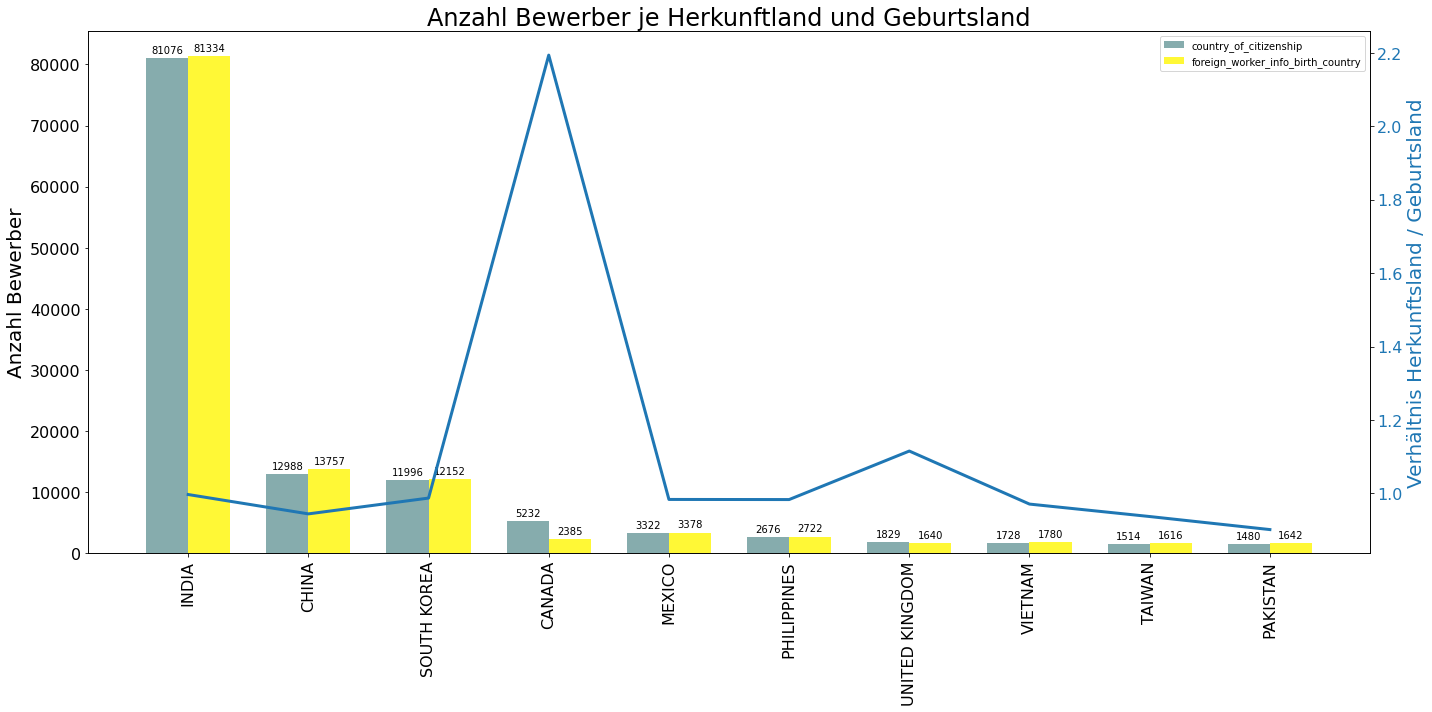

In [72]:
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

labels = graph_df.index


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax  = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, values_coz, width, label='country_of_citizenship')
rects2 = ax.bar(x + width/2, values_fwibc, width, label='foreign_worker_info_birth_country')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Anzahl Bewerber')
ax.set_title('Anzahl Bewerber je Herkunftland und Geburtsland')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

ax.legend()

ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Verhältnis Herkunftsland / Geburtsland', color=color)  # we already handled the x-label with ax1
ax2.plot(x, values_rel, color=color)
ax2.tick_params(axis='y', labelcolor=color)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()




Aussage des Graphen:
- die meisten Bewerber kommen aus Indien, China und Südkorea
- Viele Bewerber aus Kanada, wurden jedoch nicht dort geboren

Wo wurden die Kandischen Bewerber geboren?

In [81]:
visas_df[visas_df["country_of_citizenship"] == "CANADA"].value_counts()[:10]

country_of_citizenship  foreign_worker_info_birth_country
CANADA                  CANADA                               2364
                        CHINA                                 597
                        INDIA                                 384
                        IRAN                                  202
                        PAKISTAN                              195
                        SOUTH KOREA                           159
                        HONG KONG                             118
                        TAIWAN                                 87
                        RUSSIA                                 74
                        MEXICO                                 67
dtype: int64

## Anzeige als Weltkarte

In [73]:
# TODO: Darstellung als Weltkarte

## Anzeige als Weltkarte

In [74]:
# TODO: Darstellung als Weltkarte